In [2]:
from numpy import*
from random import*
from pylab import*

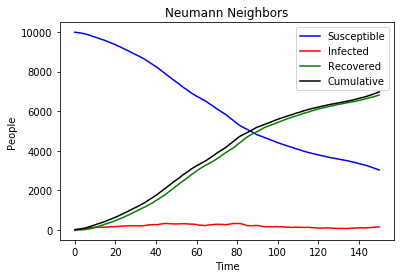

In [22]:
Nr = 100
Nc = 100
T = 150
recovery = 5
N = Nr * Nc
s = zeros((Nr,Nc))
R = zeros((Nr,Nc)) # time indicator telling us how long people are sick for
sd = .7 # social distancing coefficient
for i in range(10): # for 10 people who are sick
    indr = randint(1,Nr-1)
    indc = randint(1,Nc-1)
    s[indr,indc] = 1
    R[indr,indc] = 1
    
Sc = zeros(T) # susceptible
Ic = zeros(T) # infected
Rc = zeros(T) # recovered
Cc = zeros(T) # cumulative
Ic[0] = 10
Sc[0] = N - Ic[0]
Cc[0] = Ic[0]

D = zeros((Nr,Nc)) 
for t in range(1,T):
    new_infection = 0
    for i in range(Nc):
        for j in range(Nr):
            D[i,j] = s[i,j] 
    for i in range(1,Nc-1): #Exclusive of the end boundary people
        for j in range(1,Nr-1): 
            if s[i,j] == 0:
                num_inf = 0
                for n in [s[i+1,j],s[i-1,j],s[i,j+1],s[i,j-1]]:
                    if n == 1:
                        num_inf += 1
                p = (num_inf/4) * sd
                tmp = rand()
                if tmp <= p:
                    D[i,j] = 1
                    R[i,j] = 1
                    new_infection += 1
            if s[i,j] == 1:
                R[i,j] += 1
                R[i,j] = min(recovery,R[i,j])
            if R[i,j] == recovery:
                D[i,j] = 2
    Cc[t] = Cc[t-1] + new_infection
    for i in range(Nc):
        for j in range(Nr):
            s[i,j] = D[i,j]
            st = s[i,j]
            if st == 0:
                Sc[t] += 1
            elif st == 1:
                Ic[t] += 1
            else:
                Rc[t] += 1
tt = linspace (0,T,T)
plot(tt,Sc,'b-', tt,Ic,'r-',tt,Rc,'g-',tt,Cc,'k-')
xlabel('Time')
ylabel('People')
legend(('Susceptible','Infected','Recovered','Cumulative'))
title('Neumann Neighbors')
show()

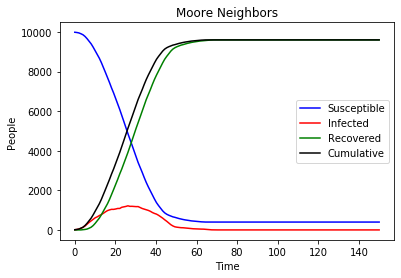

In [23]:
Nr = 100
Nc = 100
T = 150

recovery = 5
N = Nr * Nc
s = zeros((Nr,Nc))
R = zeros((Nr,Nc)) # time indicator telling us how long people are sick for
sd = .7 # social distanicing coefficient 
for i in range(10): 
    indr = randint(1,Nr-1)
    indc = randint(1,Nc-1)
    s[indr,indc] = 1
    R[indr,indc] = 1

Sc = zeros(T) # susceptible
Ic = zeros(T) # infected
Rc = zeros(T) # recovered
Cc = zeros(T) # cumulative

Ic[0] = 10
Sc[0] = N - Ic[0]
Cc[0] = Ic[0]

D = zeros((Nr,Nc)) 
for t in range(1,T):
    new_infection = 0
    for i in range(Nc):
        for j in range(Nr):
            D[i,j] = s[i,j] 
    for i in range(1,Nc-1): # Exclusive of the last person in the range
        for j in range(1,Nr-1): 
            if s[i,j] == 0:
                num_inf = 0
                for n in [s[i+1,j],s[i-1,j],s[i,j+1],s[i,j-1],s[i-1,j-1],s[i+1,j-1],s[i-1,j+1],s[i+1,j+1]]:
                    if n == 1:
                        num_inf += 1
                p = (num_inf/4) * sd
                tmp = rand()
                if tmp <= p:
                    D[i,j] = 1
                    R[i,j] = 1
                    new_infection += 1
            if s[i,j] == 1:
                R[i,j] += 1
                R[i,j] = min(recovery,R[i,j])
            if R[i,j] == recovery:
                D[i,j] = 2
    Cc[t] = Cc[t-1] + new_infection
    for i in range(Nc):
        for j in range(Nr):
            s[i,j] = D[i,j]
            st = s[i,j]
            if st == 0:
                Sc[t] += 1
            elif st == 1:
                Ic[t] += 1
            else:
                Rc[t] += 1
tt = linspace (0,T,T)
plot(tt,Sc,'b-', tt,Ic,'r-',tt,Rc,'g-',tt,Cc,'k-')
xlabel('Time')
ylabel('People')
legend(('Susceptible','Infected','Recovered','Cumulative'))
title('Moore Neighbors')
show()

1. In Moore neighbors, the infection rate is much faster.
2. Moore model peaked the infections around 42 days, as compared to 100 days during neumann model. 
3. I got a much steeper plot for the cumulative parameter for moore neigbours as compared to Neumann. 
4. In neumann model lesses infected people are obtained in 7000-8000 range, where as in Moore model the range is from 9000-10000
5. Moore model assumes that that two times more people are infected than neumann, hence results make sense.

Question 2:

In [ ]:
sd_list = arange(5,40,3)/100
cumulative_avg = zeros(len(sd_list))
for k in range(5):
    cumulative = []
    for sd in sd_list:
        Nr = 100; Nc = 100; T = 100
        recovery = 5
        N = Nr * Nc
        s = zeros((Nr,Nc))
        R = zeros((Nr,Nc)) # indicator function (Keeping track of how long people are sick)
        for i in range(10): # start with 10 sick people randomly spaced
            indr = randint(1,Nr-1)
            indc = randint(1,Nc-1)
            s[indr,indc] = 1
            R[indr,indc] = 1
        Sc = zeros(T) # susceptible
        Ic = zeros(T) # infected
        Rc = zeros(T) # recovered
        Cc = zeros(T) # cumulative
        Ic[0] = 10
        Sc[0] = N - Ic[0]
        Cc[0] = Ic[0]
        D = zeros((Nr,Nc)) # "Dummy memory space" used to update R all a t once
        for t in range(1,T):
            new_infection = 0
            for i in range(Nc):
                for j in range(Nr):
                    D[i,j] = s[i,j] # update memory space
            for i in range(1,Nc-1): # we are not considering
                for j in range(1,Nr-1): # people on the boundary
                    if s[i,j] == 0:
                        num_inf = 0
                        for n in [s[i+1,j],s[i-1,j],s[i,j+1],s[i,j-1],s[i-1,j-1],s[i+1,j-1],s[i-1,j+1],s[i+1,j+1]]:
                            if n == 1:
                                num_inf += 1
                        p = (num_inf/4) * sd
                        tmp = rand()
                        if tmp <= p:
                            D[i,j] = 1
                            R[i,j] = 1
                            new_infection += 1
                    if s[i,j] == 1:
                        R[i,j] += 1
                        R[i,j] = min(recovery,R[i,j])
                    if R[i,j] == recovery:
                        D[i,j] = 2
            Cc[t] = Cc[t-1] + new_infection
            for i in range(Nc):
                for j in range(Nr):
                    s[i,j] = D[i,j]
                    st = s[i,j]
                    if st == 0:
                        Sc[t] += 1
                    elif st == 1:
                        Ic[t] += 1
                    else:
                        Rc[t] += 1
        cumulative.append(max(Cc))
    cumulative_avg += cumulative
cumulative_avg = cumulative_avg/5
plot(sd_list,cumulative_avg)
xlabel('Social Distancing Factor')
ylabel('Cumulative Infections')
title('Social Distancing vs. Total Infections')
show()

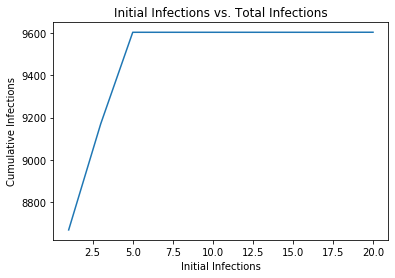

In [5]:
in_list = [1,3,5,7,10,13,17,20]
cumulative_avg = zeros(len(in_list))
for k in range(5):
    cumulative = []
    for number in in_list:
        Nr = 100; Nc = 100; T = 100
        recovery = 5
        N = Nr * Nc
        s = zeros((Nr,Nc))
        R = zeros((Nr,Nc)) # indicator function (Keeping track of how long people are sick)
        for i in range(number): # start with 10 sick people randomly spaced
            indr = randint(1,Nr-1)
            indc = randint(1,Nc-1)
            s[indr,indc] = 1
            R[indr,indc] = 1
        Sc = zeros(T) # susceptible
        Ic = zeros(T) # infected
        Rc = zeros(T) # recovered
        Cc = zeros(T) # cumulative
        Ic[0] = number
        Sc[0] = N - Ic[0]
        Cc[0] = Ic[0]
        D = zeros((Nr,Nc)) # "Dummy memory space" used to update R all a t once
        for t in range(1,T):
            new_infection = 0
            for i in range(Nc):
                for j in range(Nr):
                    D[i,j] = s[i,j] # update memory space
            for i in range(1,Nc-1): # we are not considering
                for j in range(1,Nr-1): # people on the boundary
                    if s[i,j] == 0:
                        num_inf = 0
                        for n in [s[i+1,j],s[i-1,j],s[i,j+1],s[i,j-1],s[i-1,j-1],s[i+1,j-1],s[i-1,j+1],s[i+1,j+1]]:
                            if n == 1:
                                num_inf += 1
                        p = (num_inf/4) * sd
                        tmp = rand()
                        if tmp <= p:
                            D[i,j] = 1
                            R[i,j] = 1
                            new_infection += 1
                    if s[i,j] == 1:
                        R[i,j] += 1
                        R[i,j] = min(recovery,R[i,j])
                    if R[i,j] == recovery:
                        D[i,j] = 2
            Cc[t] = Cc[t-1] + new_infection
            for i in range(Nc):
                for j in range(Nr):
                    s[i,j] = D[i,j]
                    st = s[i,j]
                    if st == 0:
                        Sc[t] += 1
                    elif st == 1:
                        Ic[t] += 1
                    else:
                        Rc[t] += 1
        cumulative.append(max(Cc))
    cumulative_avg += cumulative
cumulative_avg = cumulative_avg/5
plot(in_list,cumulative_avg)
xlabel('Initial Infections')
ylabel('Cumulative Infections')
title('Initial Infections vs. Total Infections')
show()

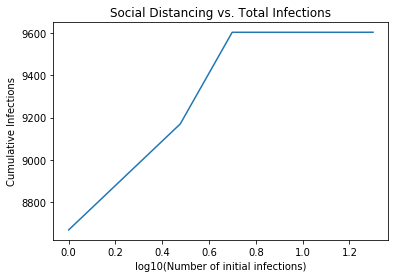

In [7]:
plot(log10(in_list),cumulative_avg)
xlabel('log10(Number of initial infections)')
ylabel('Cumulative Infections')
title('Social Distancing vs. Total Infections')
show()